### Importing important libraries

In [5]:
import pandas as pd

# Merging all sales data

In [2]:
# Creating a list with all month's sales.

import os

sales = os.listdir("Sales_Data")

sales

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [3]:
# Appending all csv to tha dataseries 'db'

df = pd.DataFrame()

for sale in sales:
    
    df2 = pd.read_csv("Sales_Data/" + sale)
    df = pd.concat([df, df2])
    
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [4]:
# Cleasing the data 
# For some reason, on my version of the csv files, there are some NaN in the register

df = df.dropna()

# Another problem is that my csv files contain some coluns that just have the name of
# the colums titles (like Quantity Ordered and Price Each) duplicated among themselves
# So i will find any duplicates and remove them

df = df[df["Order ID"] != "Order ID"]


In [5]:
# Creating the new archive

df.to_csv("All_Months.csv", index = False)


### Starting to read from the new archive 
###### (the previous session should be executed only once to create the archive)

In [6]:
df = pd.read_csv("All_Months.csv")


In [13]:
# Passing Quantity Ordered and Price Each to int and float, respectively.

df["Price Each"] = pd.to_numeric(df["Price Each"]) 
df["Quantity Ordered"] = pd.to_numeric( df["Quantity Ordered"]) 

df


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Time
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",08:46
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",22:30
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",14:38
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",14:38
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",09:27
...,...,...,...,...,...,...,...
185945,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",20:56
185946,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",16:00
185947,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",07:39
185948,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",17:30


# Wich month was the best for sales? 

In [8]:
# Lots of weird messages pops up when a try to run this code. 
# But it works as expected.

totals = []

for i in range(1, 13):

    month = df[df["Order Date"].str[0:2] == (f"0{i}" if i < 10 else f"{i}")]
    
    month["Total"] = month["Price Each"] * month["Quantity Ordered"]

    totals.append(month.sum()["Total"])

months = pd.Series(totals, 
                   index = "Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec".split(" ")
                  )



/tmp/ipykernel_3096/3961323297.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month["Total"] = month["Price Each"] * month["Quantity Ordered"]
/tmp/ipykernel_3096/3961323297.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month["Total"] = month["Price Each"] * month["Quantity Ordered"]
/tmp/ipykernel_3096/3961323297.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

Sales (in millions of dollars) by month: 


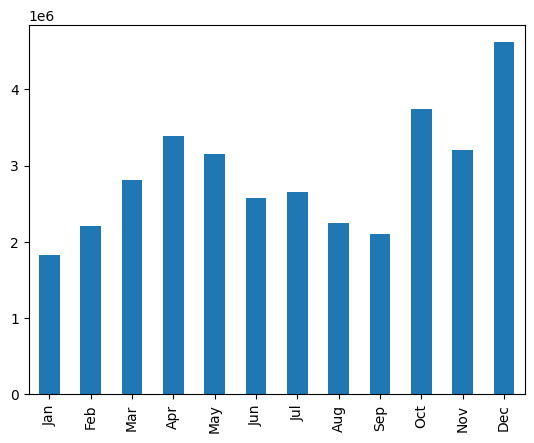

In [9]:
# Spoiler: Its December :)

months.plot.bar()

#months.plot(figsize = (9, 5))

print("Sales (in millions of dollars) by month: ")

# Wich city sold the most of each product?

In [85]:
def get_city(adress):
    return adress.split(", ")[1]

def get_state(adress):
    return adress.split(", ")[2][0:2]


df["City"] = df["Purchase Address"].apply(lambda x : get_city(x) + " " + get_state(x) )

df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Dallas TX
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Boston MA
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Los Angeles CA
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Los Angeles CA
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Los Angeles CA
...,...,...,...,...,...,...,...
185945,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",Los Angeles CA
185946,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",San Francisco CA
185947,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",San Francisco CA
185948,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",San Francisco CA


In [87]:
citys = df.groupby('Product')['City'].agg(pd.Series.mode)
citys

Product
20in Monitor                  San Francisco CA
27in 4K Gaming Monitor        San Francisco CA
27in FHD Monitor              San Francisco CA
34in Ultrawide Monitor        San Francisco CA
AA Batteries (4-pack)         San Francisco CA
AAA Batteries (4-pack)        San Francisco CA
Apple Airpods Headphones      San Francisco CA
Bose SoundSport Headphones    San Francisco CA
Flatscreen TV                 San Francisco CA
Google Phone                  San Francisco CA
LG Dryer                      San Francisco CA
LG Washing Machine            San Francisco CA
Lightning Charging Cable      San Francisco CA
Macbook Pro Laptop            San Francisco CA
ThinkPad Laptop               San Francisco CA
USB-C Charging Cable          San Francisco CA
Vareebadd Phone               San Francisco CA
Wired Headphones              San Francisco CA
iPhone                        San Francisco CA
Name: City, dtype: object

##### So, San Francisco CA sold most products.

# Question 3: What time should we advertise most?
## What time ocurred the most sales

In [9]:
# Creating the time column
def get_time(x):
    return x.split(" ")[1]


df["Time"] = df["Order Date"].apply(lambda x:get_time(x))

<Axes: xlabel='Time'>

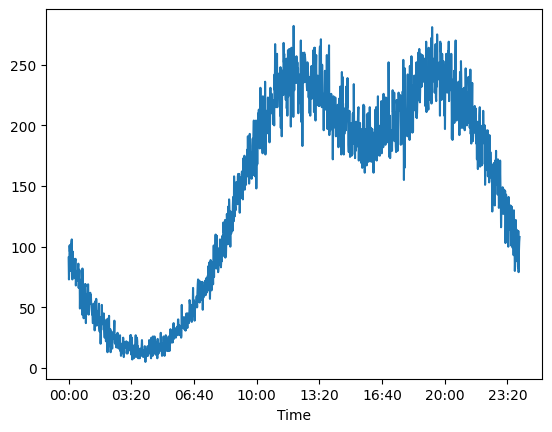

In [12]:
# Verifying by Quantity Ordered

df.groupby("Time")["Quantity Ordered"].sum().plot()

<Axes: xlabel='Time'>

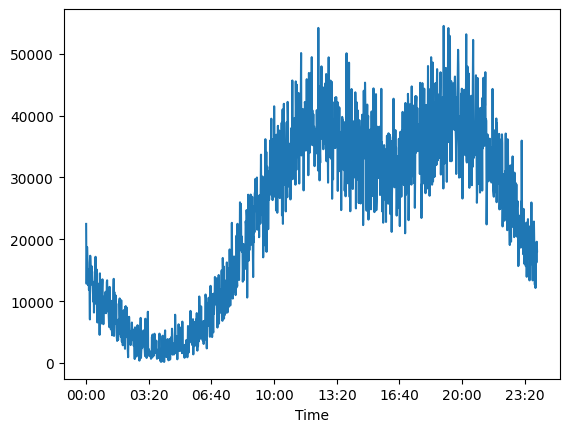

In [18]:
# Verifying by total

df["Total"] = df["Quantity Ordered"] * df["Price Each"]

df.groupby("Time")["Total"].sum().plot()

### So a good time to start advertising would be between 11 am and 21pm